# Introduction to Regression with Neural Networks in TensorFlow

🟢 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.1


## Regression analysis
**Source**: https://en.wikipedia.org/wiki/Regression_analysis

![Regression Analysis](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

## Creating data to view and fit

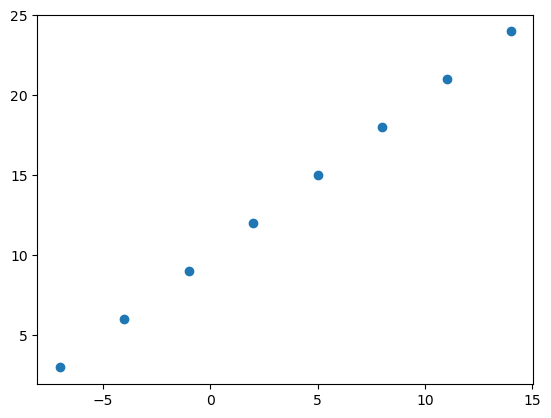

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (Indepent variables)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (Dependent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [11]:
# We created the definition above with a relationship 
# between X and y as the function X + 10:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [9]:
# Validating if y == X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [17]:
# Create a fast demo tensor for our housing price prediction 
# problem # to understand how input and output shape is
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [19]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

⚠️ If some error like Input 0 of layer "dense" is incompatible with the layer....

This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

OLD
model.fit(X, y, epochs=5)

NEW
model.fit( tf.expand_dims(X, axis=-1), y, epochs=5)

In [20]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

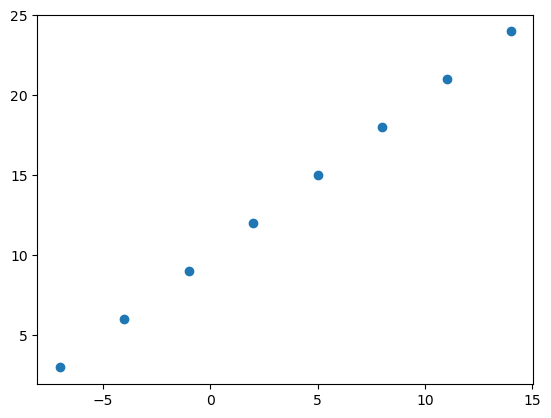

In [22]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
# Note: Loss MAE is used for comparisons of predicted versus observed

model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 129ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [29]:
# Check out X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [31]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 20ms/step


array([[12.716021]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increate the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **ephocs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [61]:
# Let's rebuild the model

# 1. Create a model (again)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 131ms/step - loss: 8.2328 - mae: 8.2328
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 8.1003 - mae: 8.1003
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 7.9678 - mae: 7.9678
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 7.8353 - mae: 7.8353
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 7.7028 - mae: 7.7028
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5703 - mae: 7.5703
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4438 - mae: 7.4438
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 7.432

In [62]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [63]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 36ms/step


array([[29.918747]], dtype=float32)

In [79]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2 . Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 172ms/step - loss: 11.9261 - mae: 11.9261
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2699 - mae: 11.2699
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6004 - mae: 10.6004
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9161 - mae: 9.9161
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2152 - mae: 9.2152
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.4948 - mae: 8.4948
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.7526 - mae: 7.7526
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9864 - mae: 6.9864
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9323 - mae: 6.9323
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.2533 - mae: 7.2533
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

In [67]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [80]:
model.predict([17.0])

1/1 [==============================] - 0s 40ms/step


array([[26.426199]], dtype=float32)

### ⭐️ Common ways to improve a deep model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer (epochs)

## Evaluating a model